# Counter Vectorizer

In [2]:
import importlib
import warnings

warnings.filterwarnings("ignore")

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
from vectorizer_module import (
    prepare_data,
    create_vectorized_datasets,
    visualize_pca,
    visualize_tsne,
    train_vanilla_models,
    visualise_training_results_per_feature,
    visualise_training_results_per_dataset,
    train_grid_search
)

In [35]:
import vectorizer_module
importlib.reload(vectorizer_module)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Polina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


<module 'vectorizer_module' from 'c:\\Users\\Polina\\Documents\\Python_files\\AI\\HONLP\\Speaker-recognition\\Vectorizers\\vectorizer_module.py'>

## Preparing the data

In [5]:
datasets = prepare_data()
vctk_train_data, vctk_test_data, ls_train_data, ls_test_data = datasets

In [6]:
vectorized_datasets = create_vectorized_datasets(CountVectorizer, datasets)

In [7]:
vectorized_datasets_bigrams = create_vectorized_datasets(CountVectorizer, datasets, ngram_range=(2, 2))

## PCA

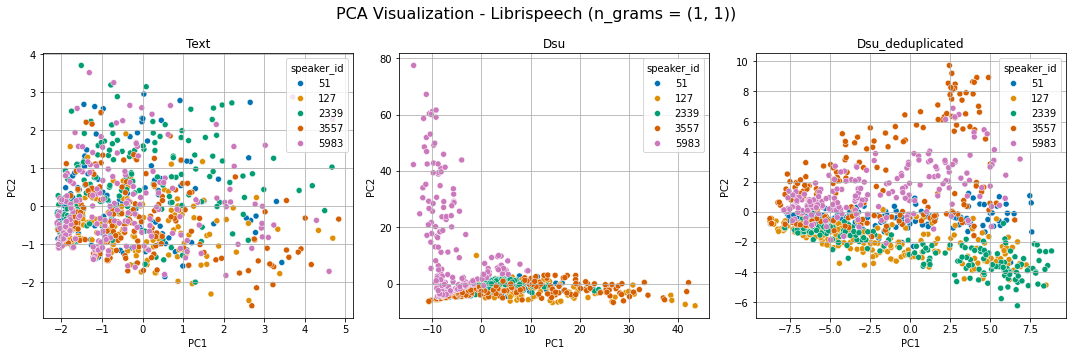

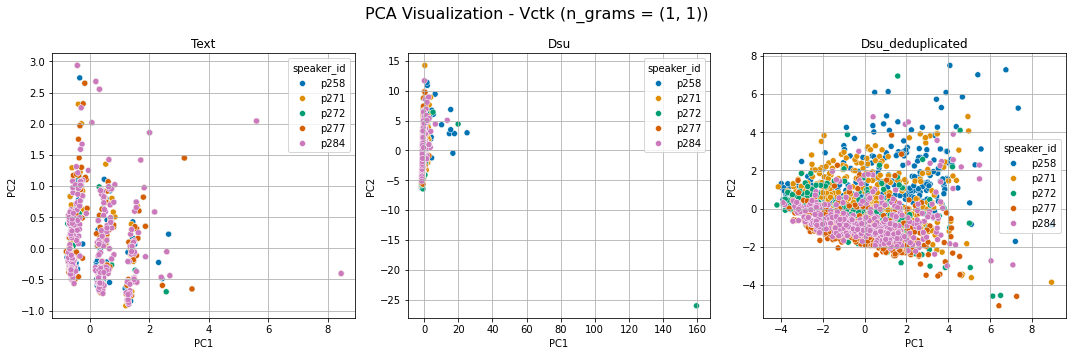

In [11]:
visualize_pca(vectorized_datasets)

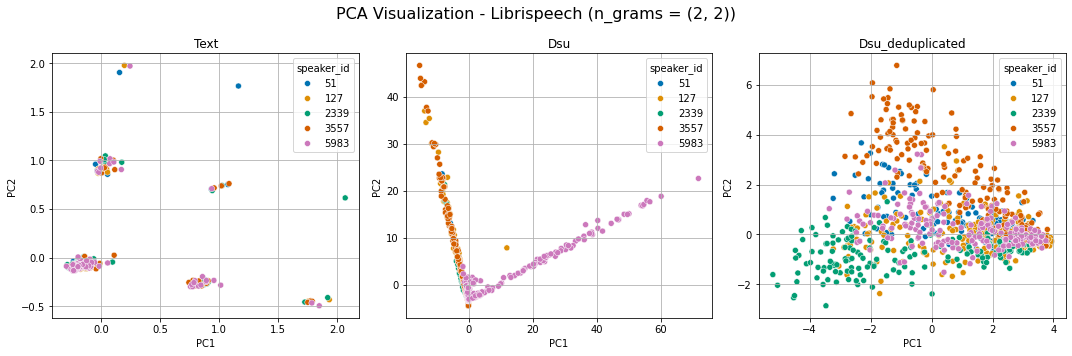

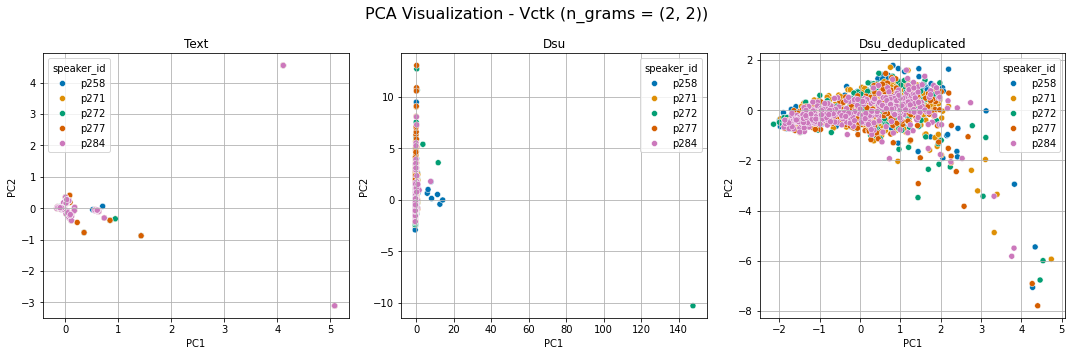

In [6]:
visualize_pca(vectorized_datasets_bigrams, n_grams=(2, 2))

## t-SNE

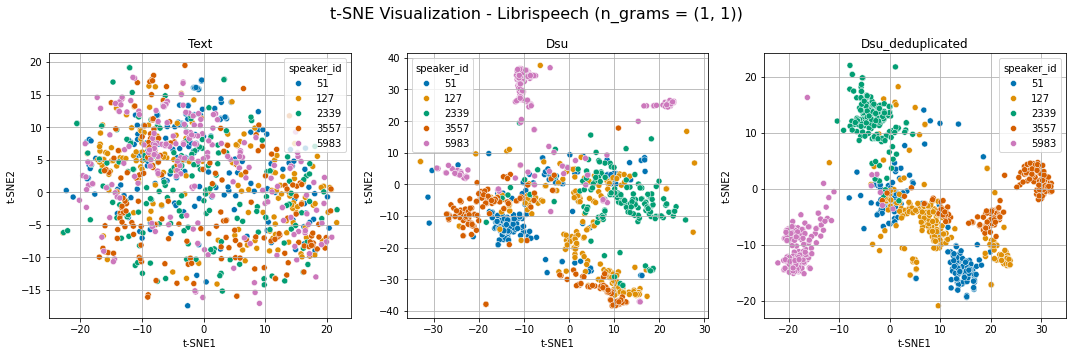

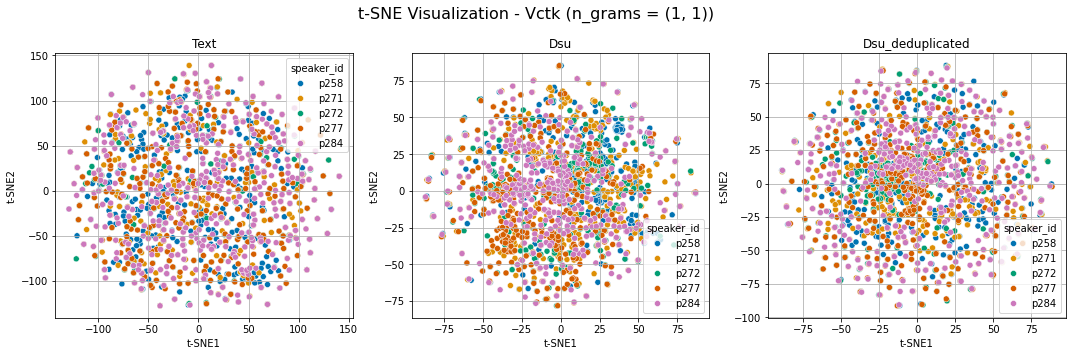

In [12]:
visualize_tsne(vectorized_datasets)

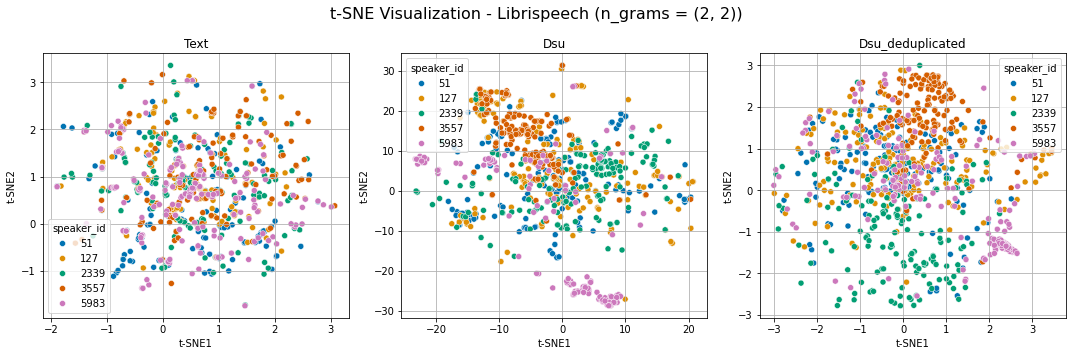

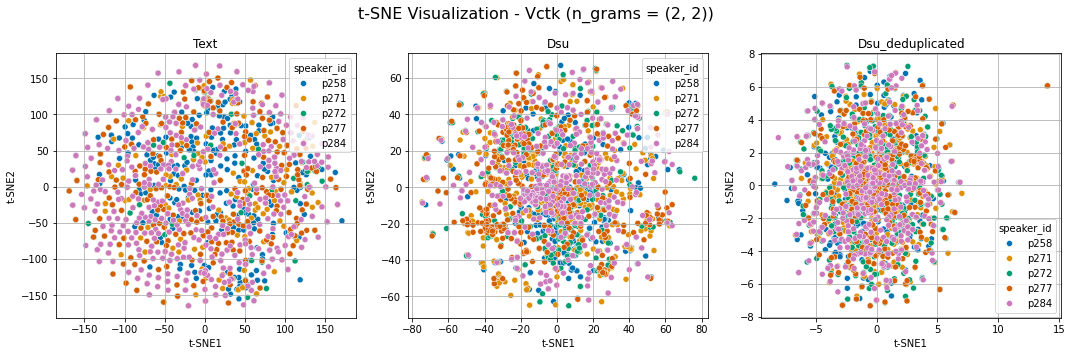

In [7]:
visualize_tsne(vectorized_datasets_bigrams, n_grams=(2, 2))

# Training models

## unigrams

In [8]:
vanilla_results = train_vanilla_models(vectorized_datasets)

Training: vctk - DSU_deduplicated - SGD LogReg: 100%|██████████| 36/36 [03:38<00:00,  6.08s/it]                     


In [21]:
vanilla_results.to_csv('CV_vanilla_unigrams.csv', index=False)


Results for type: text (n_grams = unigrams)
+-------------+--------------------------+------------+-------------+------------+------------+------------------+
| Dataset     | Model                    |   Accuracy |   Precision |     Recall |   F1-Score |   Execution_Time |
|-------------+--------------------------+------------+-------------+------------+------------+------------------|
| librispeech | Logistic Regression      | 0.508523   |  0.532807   | 0.508523   | 0.506731   |        4.79074   |
| librispeech | Multinomial Naive Bayes  | 0.477273   |  0.547876   | 0.477273   | 0.461277   |        0.0180044 |
| librispeech | Decision Tree Classifier | 0.275568   |  0.276648   | 0.275568   | 0.269217   |        1.70703   |
| librispeech | Random Forest            | 0.426136   |  0.458691   | 0.426136   | 0.420557   |       10.2371    |
| librispeech | SGD SVM                  | 0.465909   |  0.490381   | 0.465909   | 0.458382   |        0.249701  |
| librispeech | SGD LogReg         

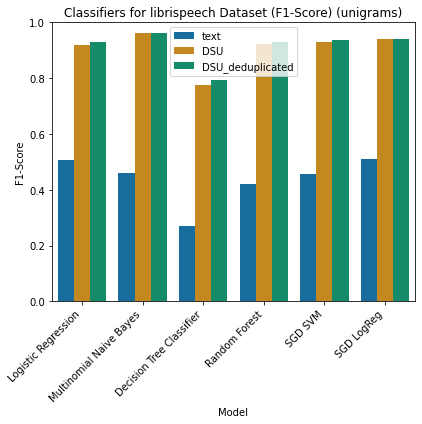

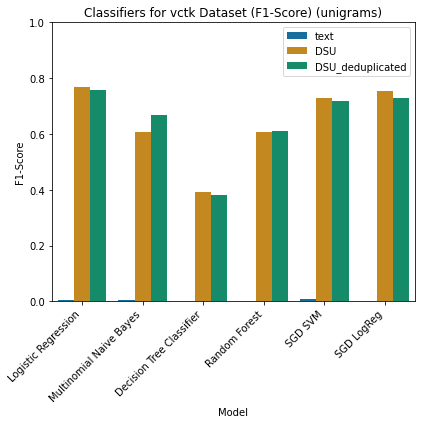

In [37]:
visualise_training_results_per_dataset(vanilla_results)

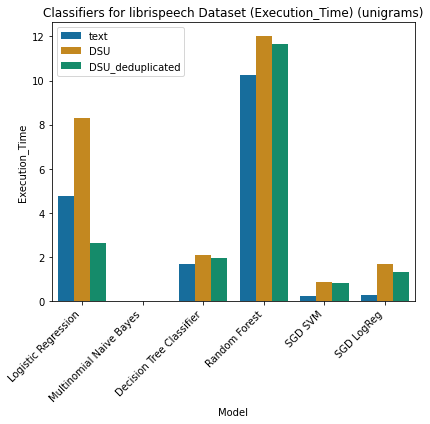

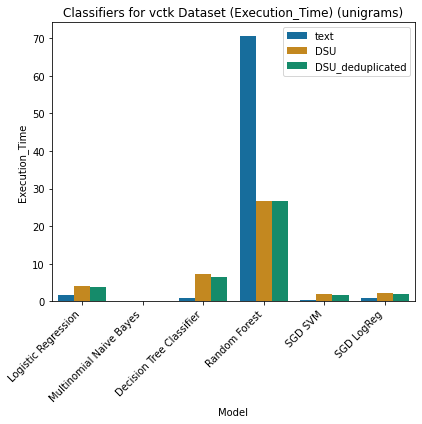

In [38]:
visualise_training_results_per_dataset(vanilla_results, metric='Execution_Time', tables=False)

## bi grams

In [11]:
vanilla_bigrams_results = train_vanilla_models(vectorized_datasets_bigrams)

Training: vctk - DSU_deduplicated - SGD LogReg: 100%|██████████| 36/36 [10:54<00:00, 18.17s/it]                     


In [19]:
vanilla_bigrams_results.to_csv('CV_vanilla_bigrams.csv', index=False)


Results for type: text (n_grams = bigrams)
+-------------+--------------------------+------------+-------------+------------+------------+------------------+
| Dataset     | Model                    |   Accuracy |   Precision |     Recall |   F1-Score |   Execution_Time |
|-------------+--------------------------+------------+-------------+------------+------------+------------------|
| librispeech | Logistic Regression      | 0.369318   |  0.439062   | 0.369318   | 0.376352   |       10.429     |
| librispeech | Multinomial Naive Bayes  | 0.423295   |  0.447749   | 0.423295   | 0.416091   |        0.0841227 |
| librispeech | Decision Tree Classifier | 0.25       |  0.303249   | 0.25       | 0.253776   |       16.302     |
| librispeech | Random Forest            | 0.301136   |  0.513332   | 0.301136   | 0.327924   |       32.1338    |
| librispeech | SGD SVM                  | 0.272727   |  0.404874   | 0.272727   | 0.284219   |        0.194062  |
| librispeech | SGD LogReg          

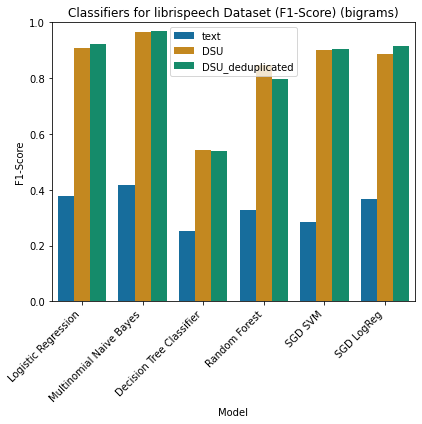

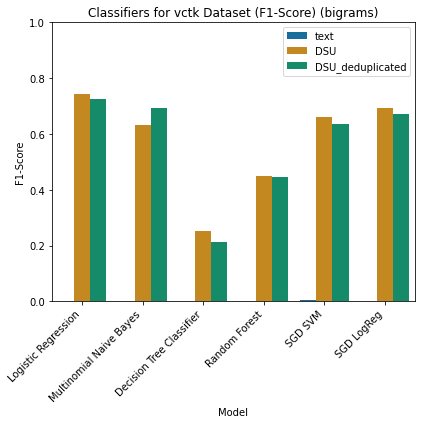

In [40]:
visualise_training_results_per_dataset(vanilla_bigrams_results, n_grams='bigrams')

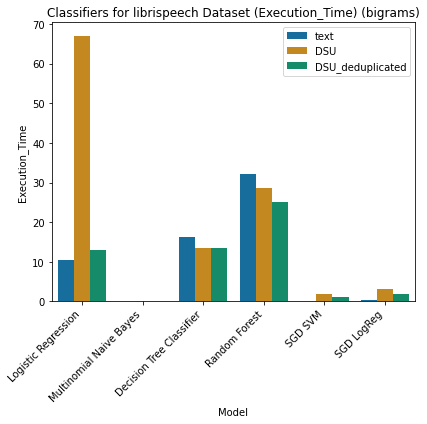

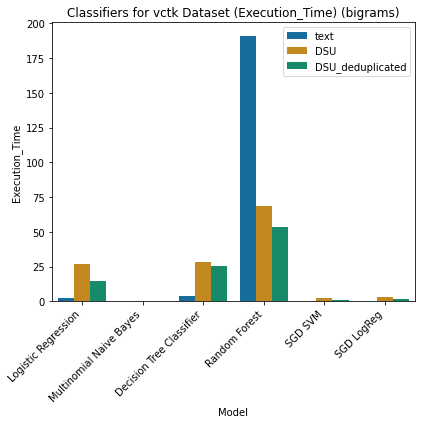

In [41]:
visualise_training_results_per_dataset(vanilla_bigrams_results, metric='Execution_Time', tables=False, n_grams='bigrams')

# Grid search 

## Unigrams

In [11]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

In [16]:
param_grid_mnb = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],  
    'fit_prior': [True, False]
}

Starting grid search for librispeech - text - MultinomialNB
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......alpha=0.001, fit_prior=True;, score=0.479 total time=   0.0s
[CV 2/5] END .......alpha=0.001, fit_prior=True;, score=0.514 total time=   0.0s
[CV 3/5] END .......alpha=0.001, fit_prior=True;, score=0.456 total time=   0.0s
[CV 4/5] END .......alpha=0.001, fit_prior=True;, score=0.477 total time=   0.0s
[CV 5/5] END .......alpha=0.001, fit_prior=True;, score=0.468 total time=   0.0s
[CV 1/5] END ......alpha=0.001, fit_prior=False;, score=0.477 total time=   0.0s
[CV 2/5] END ......alpha=0.001, fit_prior=False;, score=0.513 total time=   0.0s
[CV 3/5] END ......alpha=0.001, fit_prior=False;, score=0.449 total time=   0.0s
[CV 4/5] END ......alpha=0.001, fit_prior=False;, score=0.475 total time=   0.0s
[CV 5/5] END ......alpha=0.001, fit_prior=False;, score=0.467 total time=   0.0s
[CV 1/5] END ........alpha=0.01, fit_prior=True;, score=0.500 total t

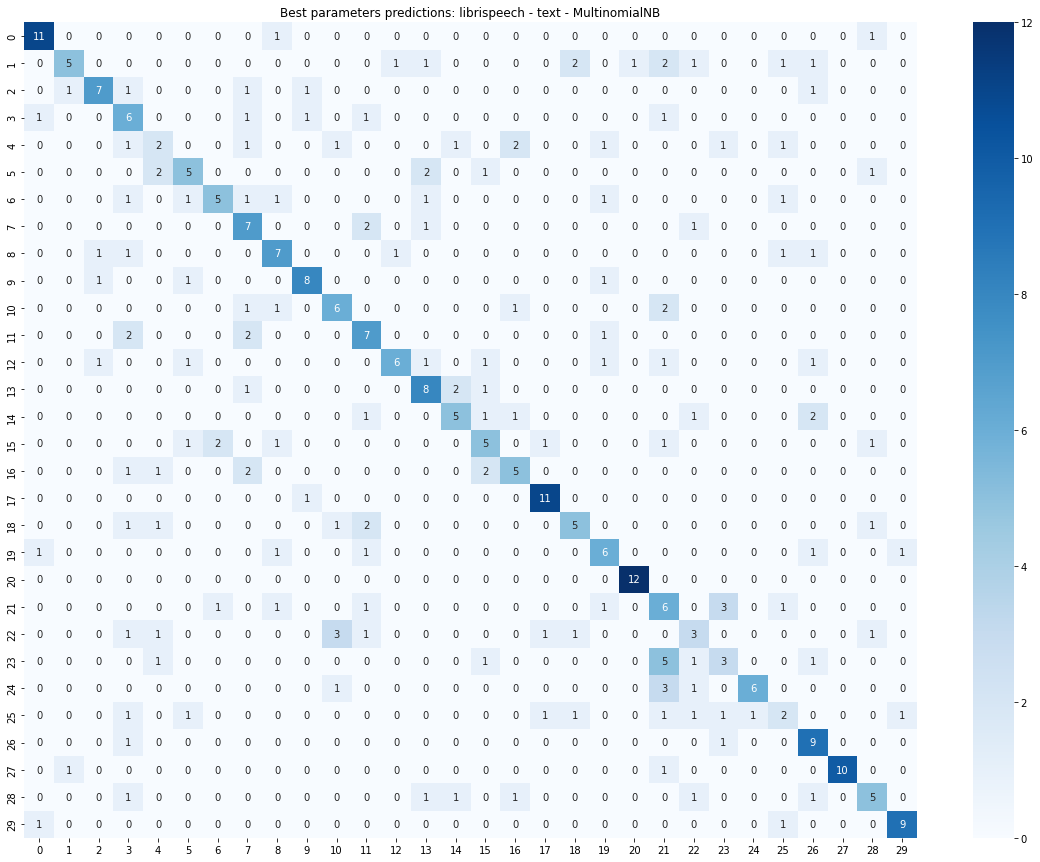

Starting grid search for librispeech - DSU - MultinomialNB
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......alpha=0.001, fit_prior=True;, score=0.921 total time=   0.0s
[CV 2/5] END .......alpha=0.001, fit_prior=True;, score=0.926 total time=   0.0s
[CV 3/5] END .......alpha=0.001, fit_prior=True;, score=0.914 total time=   0.0s
[CV 4/5] END .......alpha=0.001, fit_prior=True;, score=0.927 total time=   0.0s
[CV 5/5] END .......alpha=0.001, fit_prior=True;, score=0.925 total time=   0.0s
[CV 1/5] END ......alpha=0.001, fit_prior=False;, score=0.921 total time=   0.0s
[CV 2/5] END ......alpha=0.001, fit_prior=False;, score=0.926 total time=   0.0s
[CV 3/5] END ......alpha=0.001, fit_prior=False;, score=0.916 total time=   0.0s
[CV 4/5] END ......alpha=0.001, fit_prior=False;, score=0.927 total time=   0.0s
[CV 5/5] END ......alpha=0.001, fit_prior=False;, score=0.925 total time=   0.0s
[CV 1/5] END ........alpha=0.01, fit_prior=True;, score=0.929 total ti

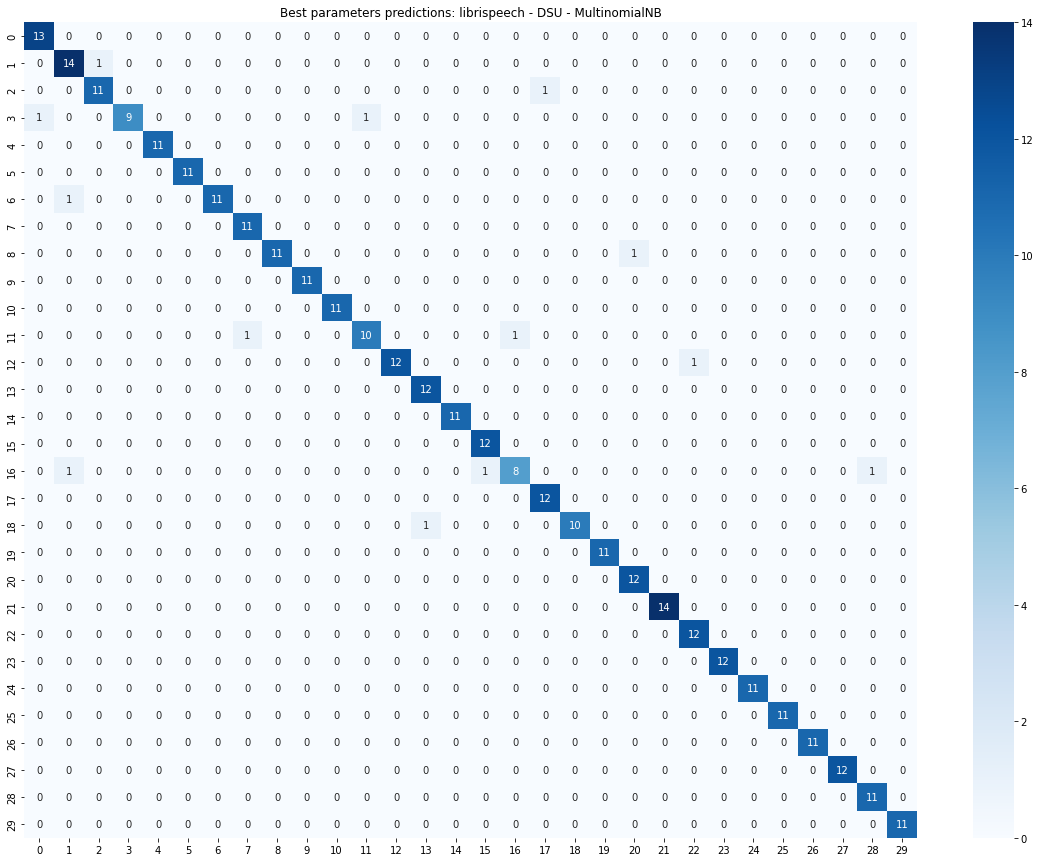

Starting grid search for librispeech - DSU_deduplicated - MultinomialNB
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......alpha=0.001, fit_prior=True;, score=0.952 total time=   0.0s
[CV 2/5] END .......alpha=0.001, fit_prior=True;, score=0.949 total time=   0.0s
[CV 3/5] END .......alpha=0.001, fit_prior=True;, score=0.953 total time=   0.0s
[CV 4/5] END .......alpha=0.001, fit_prior=True;, score=0.954 total time=   0.0s
[CV 5/5] END .......alpha=0.001, fit_prior=True;, score=0.956 total time=   0.0s
[CV 1/5] END ......alpha=0.001, fit_prior=False;, score=0.952 total time=   0.0s
[CV 2/5] END ......alpha=0.001, fit_prior=False;, score=0.949 total time=   0.0s
[CV 3/5] END ......alpha=0.001, fit_prior=False;, score=0.953 total time=   0.0s
[CV 4/5] END ......alpha=0.001, fit_prior=False;, score=0.955 total time=   0.0s
[CV 5/5] END ......alpha=0.001, fit_prior=False;, score=0.956 total time=   0.0s
[CV 1/5] END ........alpha=0.01, fit_prior=True;, score=0

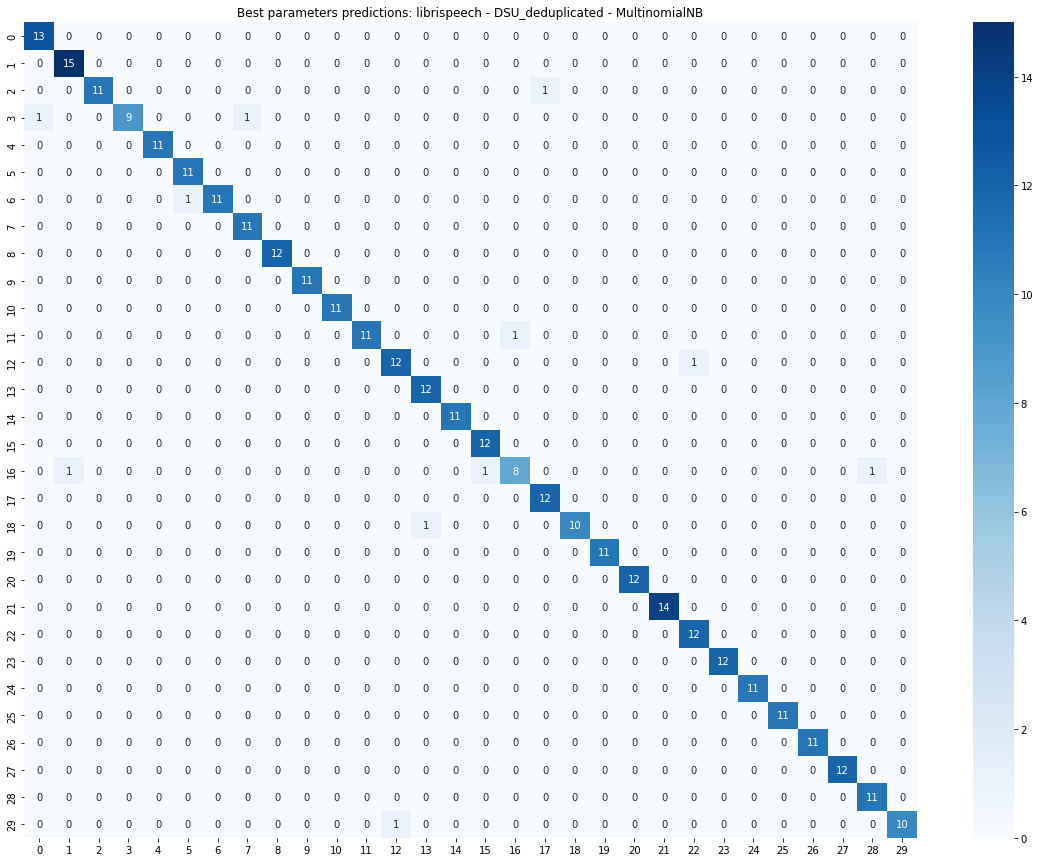

Starting grid search for vctk - text - MultinomialNB
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......alpha=0.001, fit_prior=True;, score=0.004 total time=   0.0s
[CV 2/5] END .......alpha=0.001, fit_prior=True;, score=0.004 total time=   0.0s
[CV 3/5] END .......alpha=0.001, fit_prior=True;, score=0.007 total time=   0.0s
[CV 4/5] END .......alpha=0.001, fit_prior=True;, score=0.005 total time=   0.0s
[CV 5/5] END .......alpha=0.001, fit_prior=True;, score=0.003 total time=   0.0s
[CV 1/5] END ......alpha=0.001, fit_prior=False;, score=0.004 total time=   0.0s
[CV 2/5] END ......alpha=0.001, fit_prior=False;, score=0.004 total time=   0.0s
[CV 3/5] END ......alpha=0.001, fit_prior=False;, score=0.006 total time=   0.0s
[CV 4/5] END ......alpha=0.001, fit_prior=False;, score=0.006 total time=   0.0s
[CV 5/5] END ......alpha=0.001, fit_prior=False;, score=0.003 total time=   0.0s
[CV 1/5] END ........alpha=0.01, fit_prior=True;, score=0.004 total time=   

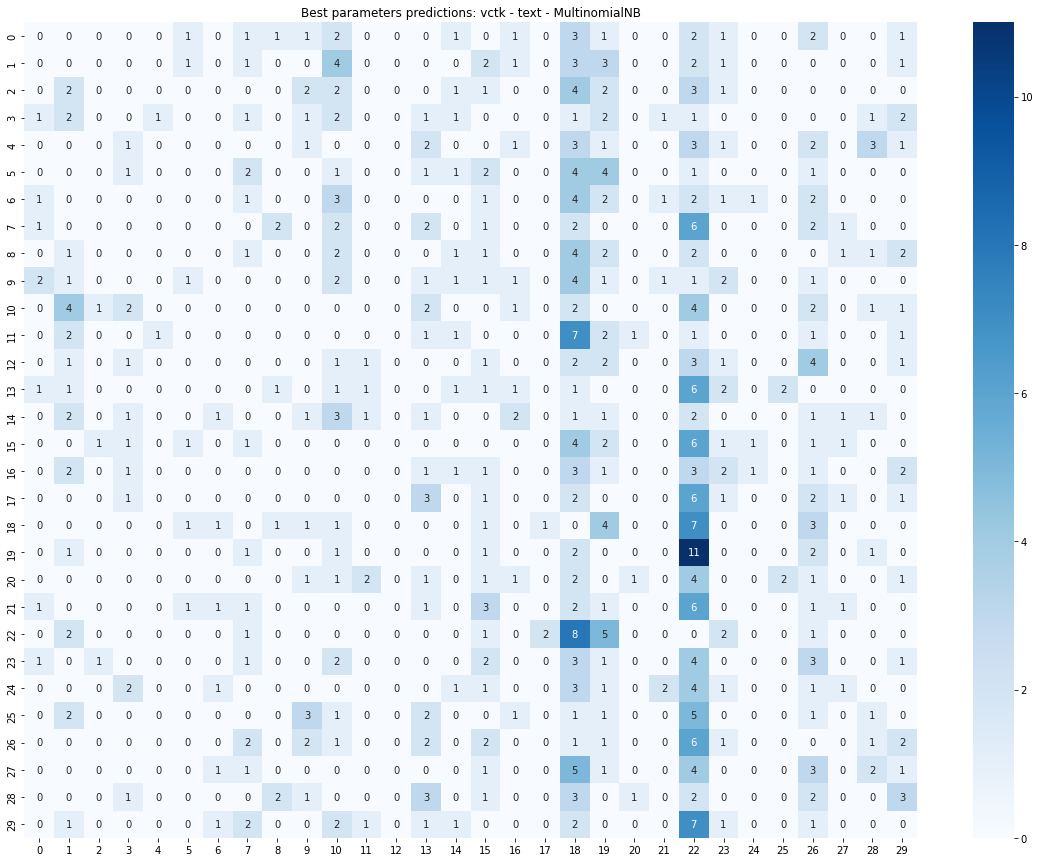

Starting grid search for vctk - DSU - MultinomialNB
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......alpha=0.001, fit_prior=True;, score=0.498 total time=   0.0s
[CV 2/5] END .......alpha=0.001, fit_prior=True;, score=0.502 total time=   0.0s
[CV 3/5] END .......alpha=0.001, fit_prior=True;, score=0.492 total time=   0.0s
[CV 4/5] END .......alpha=0.001, fit_prior=True;, score=0.521 total time=   0.0s
[CV 5/5] END .......alpha=0.001, fit_prior=True;, score=0.492 total time=   0.0s
[CV 1/5] END ......alpha=0.001, fit_prior=False;, score=0.498 total time=   0.0s
[CV 2/5] END ......alpha=0.001, fit_prior=False;, score=0.501 total time=   0.0s
[CV 3/5] END ......alpha=0.001, fit_prior=False;, score=0.492 total time=   0.0s
[CV 4/5] END ......alpha=0.001, fit_prior=False;, score=0.523 total time=   0.0s
[CV 5/5] END ......alpha=0.001, fit_prior=False;, score=0.491 total time=   0.0s
[CV 1/5] END ........alpha=0.01, fit_prior=True;, score=0.530 total time=   0

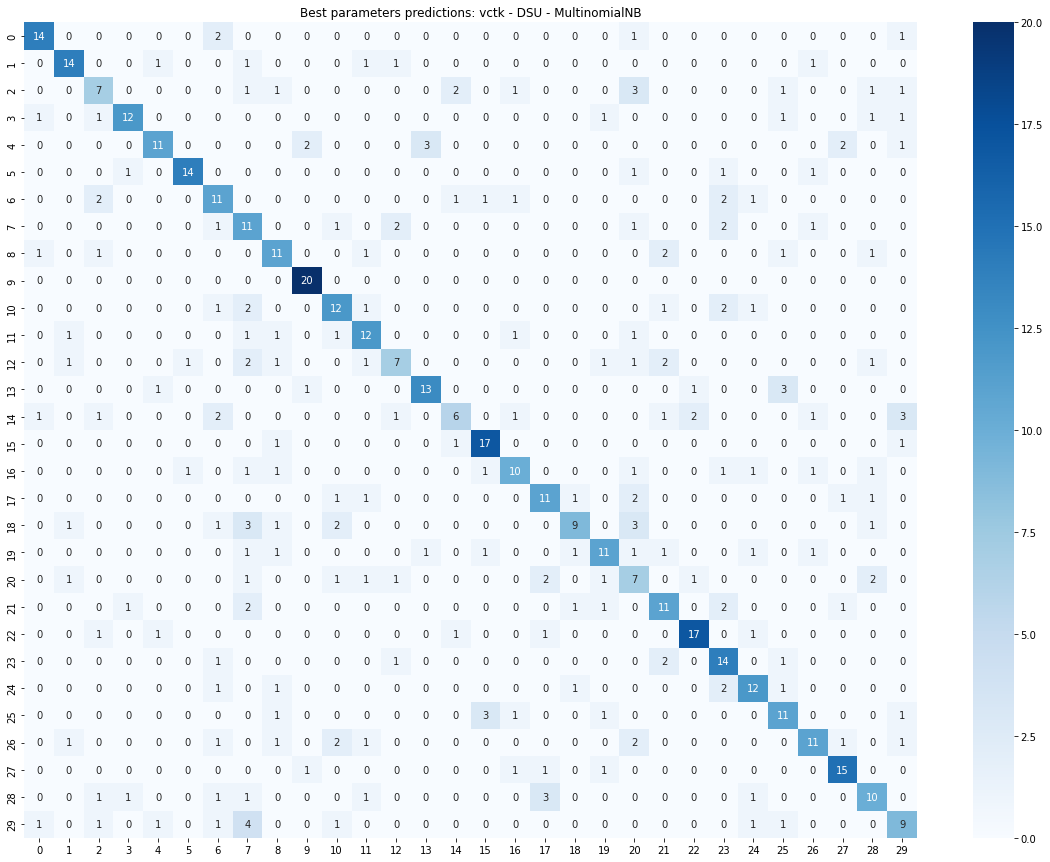

Starting grid search for vctk - DSU_deduplicated - MultinomialNB
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......alpha=0.001, fit_prior=True;, score=0.587 total time=   0.0s
[CV 2/5] END .......alpha=0.001, fit_prior=True;, score=0.595 total time=   0.0s
[CV 3/5] END .......alpha=0.001, fit_prior=True;, score=0.583 total time=   0.0s
[CV 4/5] END .......alpha=0.001, fit_prior=True;, score=0.610 total time=   0.0s
[CV 5/5] END .......alpha=0.001, fit_prior=True;, score=0.585 total time=   0.0s
[CV 1/5] END ......alpha=0.001, fit_prior=False;, score=0.587 total time=   0.0s
[CV 2/5] END ......alpha=0.001, fit_prior=False;, score=0.595 total time=   0.0s
[CV 3/5] END ......alpha=0.001, fit_prior=False;, score=0.583 total time=   0.0s
[CV 4/5] END ......alpha=0.001, fit_prior=False;, score=0.610 total time=   0.0s
[CV 5/5] END ......alpha=0.001, fit_prior=False;, score=0.587 total time=   0.0s
[CV 1/5] END ........alpha=0.01, fit_prior=True;, score=0.607 to

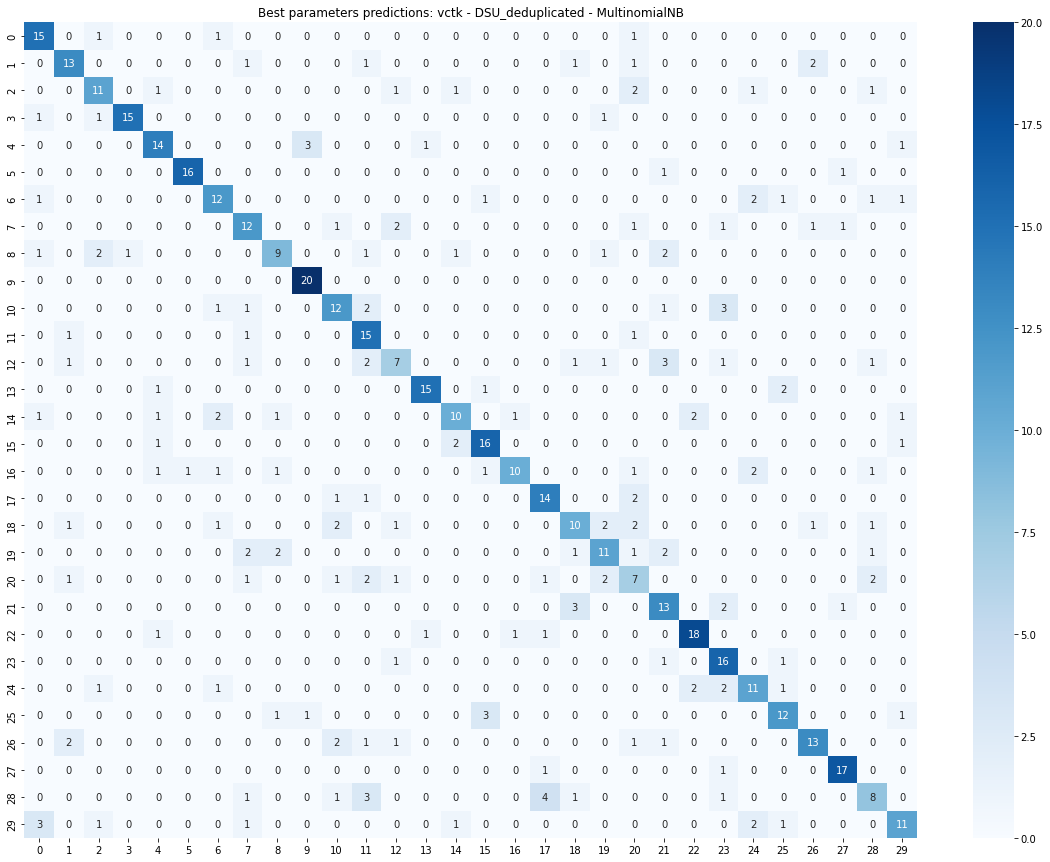

In [36]:
grid_mnb_results = []
confusion_matrices_mnb = []
for dataset_name, dataset_data in vectorized_datasets.items():
    for feature_name in ['text', 'DSU', 'DSU_deduplicated']:
        results_grid, matrix = train_grid_search(  
            vectorized_datasets,
            dataset_name,
            feature_name,
            model=mnb,
            param_grid=param_grid_mnb,
            scoring_metric='f1_weighted'
        )

        grid_mnb_results.extend(results_grid) 
        confusion_matrices_mnb.extend(matrix)

## Bigrams

Starting grid search for librispeech - text - MultinomialNB
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......alpha=0.001, fit_prior=True;, score=0.364 total time=   0.0s
[CV 2/5] END .......alpha=0.001, fit_prior=True;, score=0.352 total time=   0.0s
[CV 3/5] END .......alpha=0.001, fit_prior=True;, score=0.323 total time=   0.0s
[CV 4/5] END .......alpha=0.001, fit_prior=True;, score=0.360 total time=   0.0s
[CV 5/5] END .......alpha=0.001, fit_prior=True;, score=0.387 total time=   0.0s
[CV 1/5] END ......alpha=0.001, fit_prior=False;, score=0.354 total time=   0.0s
[CV 2/5] END ......alpha=0.001, fit_prior=False;, score=0.344 total time=   0.0s
[CV 3/5] END ......alpha=0.001, fit_prior=False;, score=0.314 total time=   0.0s
[CV 4/5] END ......alpha=0.001, fit_prior=False;, score=0.356 total time=   0.0s
[CV 5/5] END ......alpha=0.001, fit_prior=False;, score=0.378 total time=   0.0s
[CV 1/5] END ........alpha=0.01, fit_prior=True;, score=0.359 total t

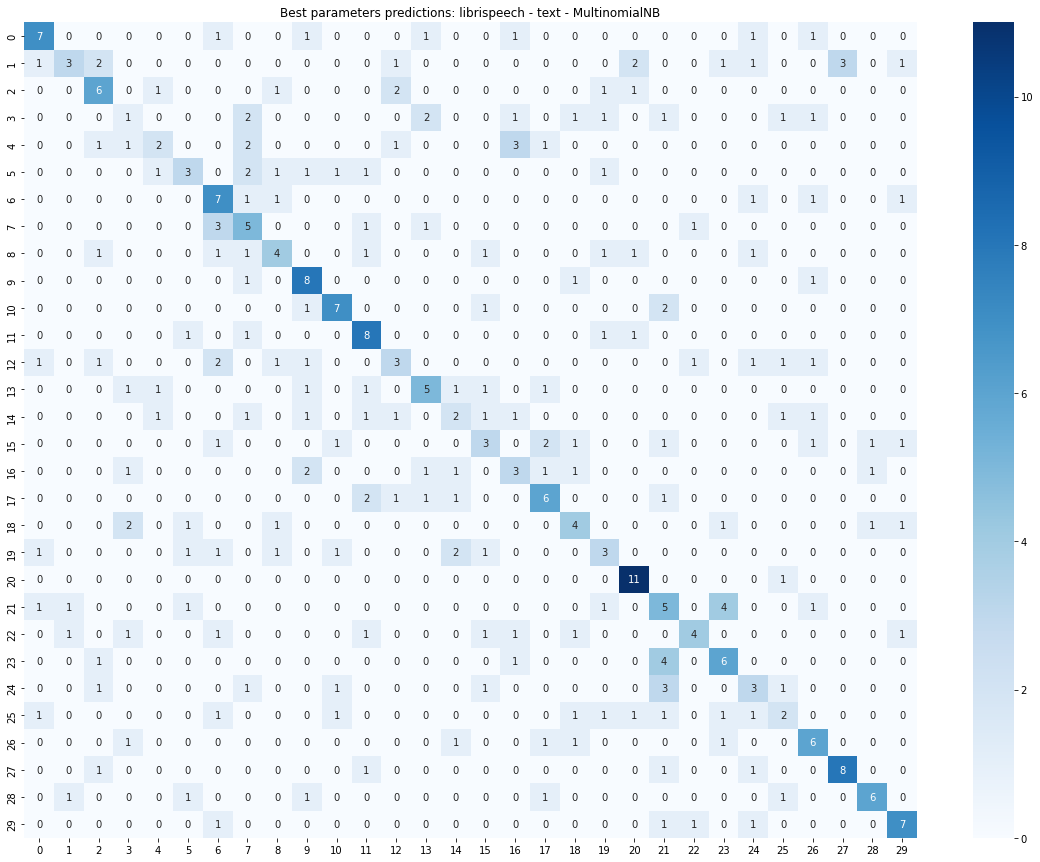

Starting grid search for librispeech - DSU - MultinomialNB
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......alpha=0.001, fit_prior=True;, score=0.962 total time=   0.1s
[CV 2/5] END .......alpha=0.001, fit_prior=True;, score=0.964 total time=   0.1s
[CV 3/5] END .......alpha=0.001, fit_prior=True;, score=0.962 total time=   0.2s
[CV 4/5] END .......alpha=0.001, fit_prior=True;, score=0.953 total time=   0.1s
[CV 5/5] END .......alpha=0.001, fit_prior=True;, score=0.968 total time=   0.1s
[CV 1/5] END ......alpha=0.001, fit_prior=False;, score=0.962 total time=   0.1s
[CV 2/5] END ......alpha=0.001, fit_prior=False;, score=0.964 total time=   0.1s
[CV 3/5] END ......alpha=0.001, fit_prior=False;, score=0.962 total time=   0.1s
[CV 4/5] END ......alpha=0.001, fit_prior=False;, score=0.953 total time=   0.1s
[CV 5/5] END ......alpha=0.001, fit_prior=False;, score=0.968 total time=   0.1s
[CV 1/5] END ........alpha=0.01, fit_prior=True;, score=0.965 total ti

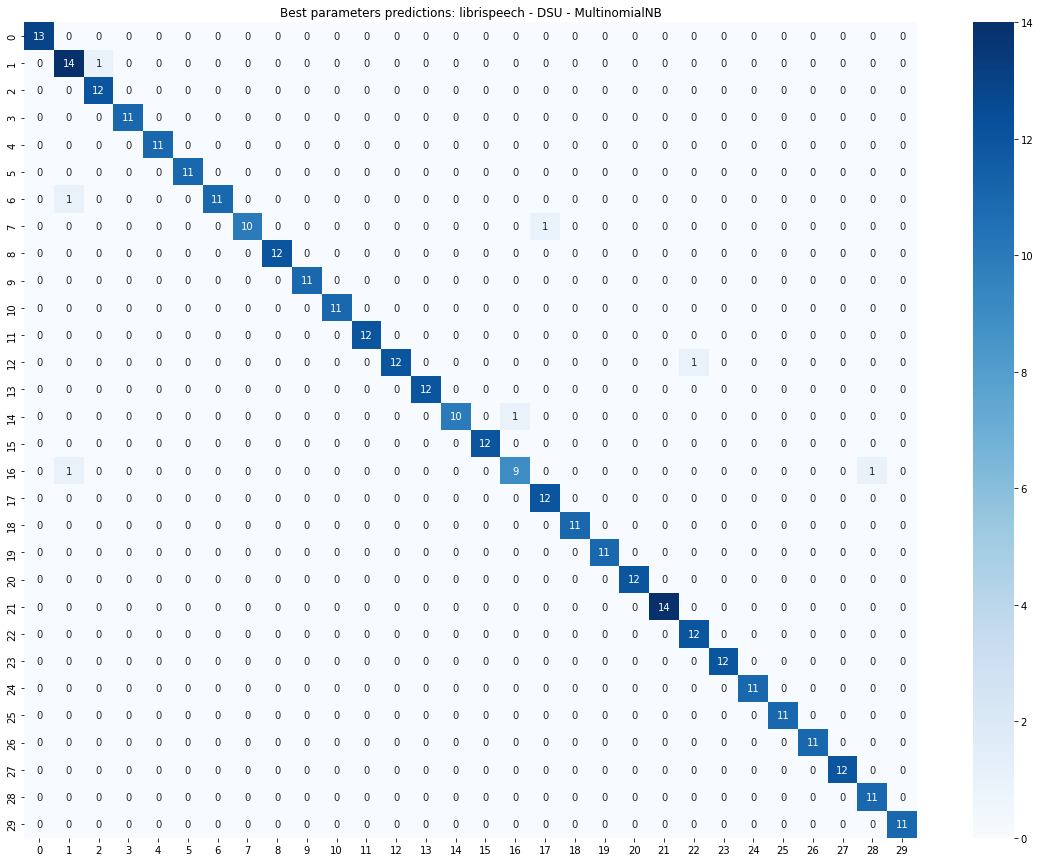

Starting grid search for librispeech - DSU_deduplicated - MultinomialNB
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......alpha=0.001, fit_prior=True;, score=0.966 total time=   0.1s
[CV 2/5] END .......alpha=0.001, fit_prior=True;, score=0.964 total time=   0.2s
[CV 3/5] END .......alpha=0.001, fit_prior=True;, score=0.963 total time=   0.2s
[CV 4/5] END .......alpha=0.001, fit_prior=True;, score=0.967 total time=   0.2s
[CV 5/5] END .......alpha=0.001, fit_prior=True;, score=0.972 total time=   0.2s
[CV 1/5] END ......alpha=0.001, fit_prior=False;, score=0.966 total time=   0.2s
[CV 2/5] END ......alpha=0.001, fit_prior=False;, score=0.964 total time=   0.2s
[CV 3/5] END ......alpha=0.001, fit_prior=False;, score=0.963 total time=   0.2s
[CV 4/5] END ......alpha=0.001, fit_prior=False;, score=0.967 total time=   0.1s
[CV 5/5] END ......alpha=0.001, fit_prior=False;, score=0.972 total time=   0.2s
[CV 1/5] END ........alpha=0.01, fit_prior=True;, score=0

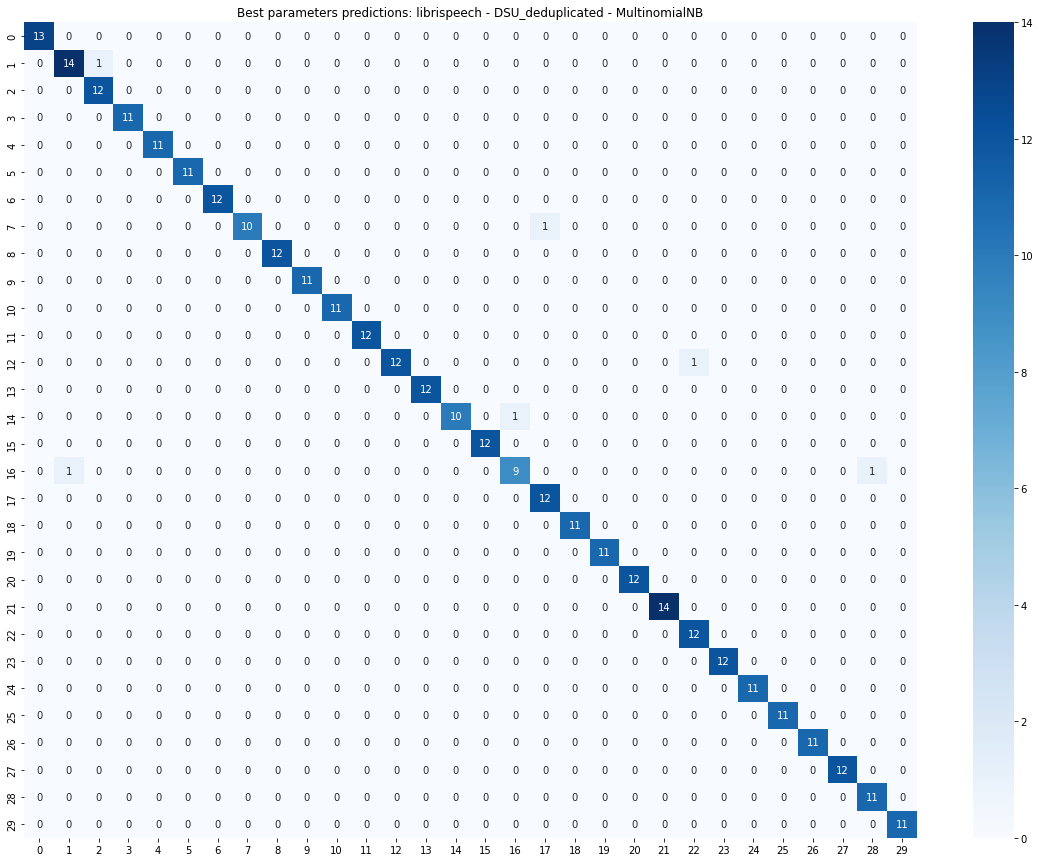

Starting grid search for vctk - text - MultinomialNB
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......alpha=0.001, fit_prior=True;, score=0.003 total time=   0.0s
[CV 2/5] END .......alpha=0.001, fit_prior=True;, score=0.002 total time=   0.0s
[CV 3/5] END .......alpha=0.001, fit_prior=True;, score=0.001 total time=   0.0s
[CV 4/5] END .......alpha=0.001, fit_prior=True;, score=0.002 total time=   0.0s
[CV 5/5] END .......alpha=0.001, fit_prior=True;, score=0.003 total time=   0.0s
[CV 1/5] END ......alpha=0.001, fit_prior=False;, score=0.003 total time=   0.0s
[CV 2/5] END ......alpha=0.001, fit_prior=False;, score=0.002 total time=   0.0s
[CV 3/5] END ......alpha=0.001, fit_prior=False;, score=0.001 total time=   0.0s
[CV 4/5] END ......alpha=0.001, fit_prior=False;, score=0.002 total time=   0.0s
[CV 5/5] END ......alpha=0.001, fit_prior=False;, score=0.003 total time=   0.0s
[CV 1/5] END ........alpha=0.01, fit_prior=True;, score=0.003 total time=   

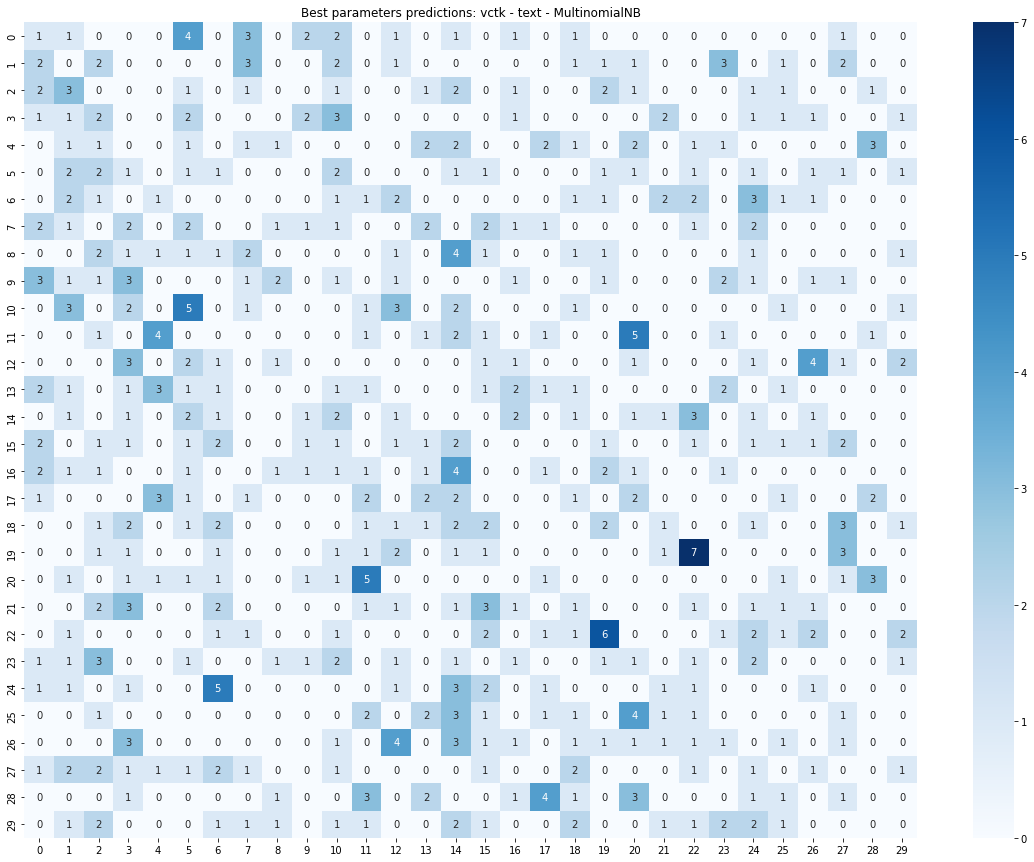

Starting grid search for vctk - DSU - MultinomialNB
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......alpha=0.001, fit_prior=True;, score=0.595 total time=   0.1s
[CV 2/5] END .......alpha=0.001, fit_prior=True;, score=0.594 total time=   0.1s
[CV 3/5] END .......alpha=0.001, fit_prior=True;, score=0.578 total time=   0.1s
[CV 4/5] END .......alpha=0.001, fit_prior=True;, score=0.607 total time=   0.1s
[CV 5/5] END .......alpha=0.001, fit_prior=True;, score=0.592 total time=   0.1s
[CV 1/5] END ......alpha=0.001, fit_prior=False;, score=0.595 total time=   0.1s
[CV 2/5] END ......alpha=0.001, fit_prior=False;, score=0.594 total time=   0.1s
[CV 3/5] END ......alpha=0.001, fit_prior=False;, score=0.578 total time=   0.1s
[CV 4/5] END ......alpha=0.001, fit_prior=False;, score=0.608 total time=   0.1s
[CV 5/5] END ......alpha=0.001, fit_prior=False;, score=0.592 total time=   0.2s
[CV 1/5] END ........alpha=0.01, fit_prior=True;, score=0.615 total time=   0

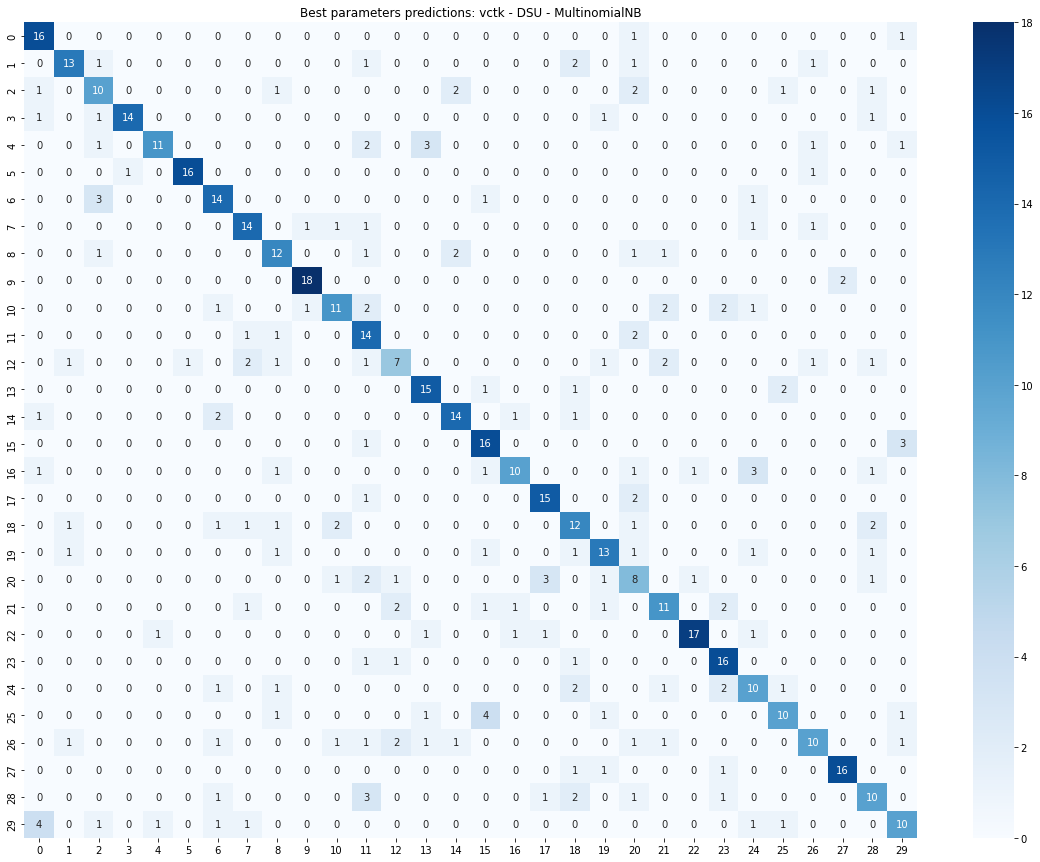

Starting grid search for vctk - DSU_deduplicated - MultinomialNB
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .......alpha=0.001, fit_prior=True;, score=0.598 total time=   0.1s
[CV 2/5] END .......alpha=0.001, fit_prior=True;, score=0.613 total time=   0.0s
[CV 3/5] END .......alpha=0.001, fit_prior=True;, score=0.586 total time=   0.1s
[CV 4/5] END .......alpha=0.001, fit_prior=True;, score=0.625 total time=   0.1s
[CV 5/5] END .......alpha=0.001, fit_prior=True;, score=0.613 total time=   0.0s
[CV 1/5] END ......alpha=0.001, fit_prior=False;, score=0.598 total time=   0.0s
[CV 2/5] END ......alpha=0.001, fit_prior=False;, score=0.613 total time=   0.1s
[CV 3/5] END ......alpha=0.001, fit_prior=False;, score=0.586 total time=   0.1s
[CV 4/5] END ......alpha=0.001, fit_prior=False;, score=0.625 total time=   0.0s
[CV 5/5] END ......alpha=0.001, fit_prior=False;, score=0.613 total time=   0.1s
[CV 1/5] END ........alpha=0.01, fit_prior=True;, score=0.633 to

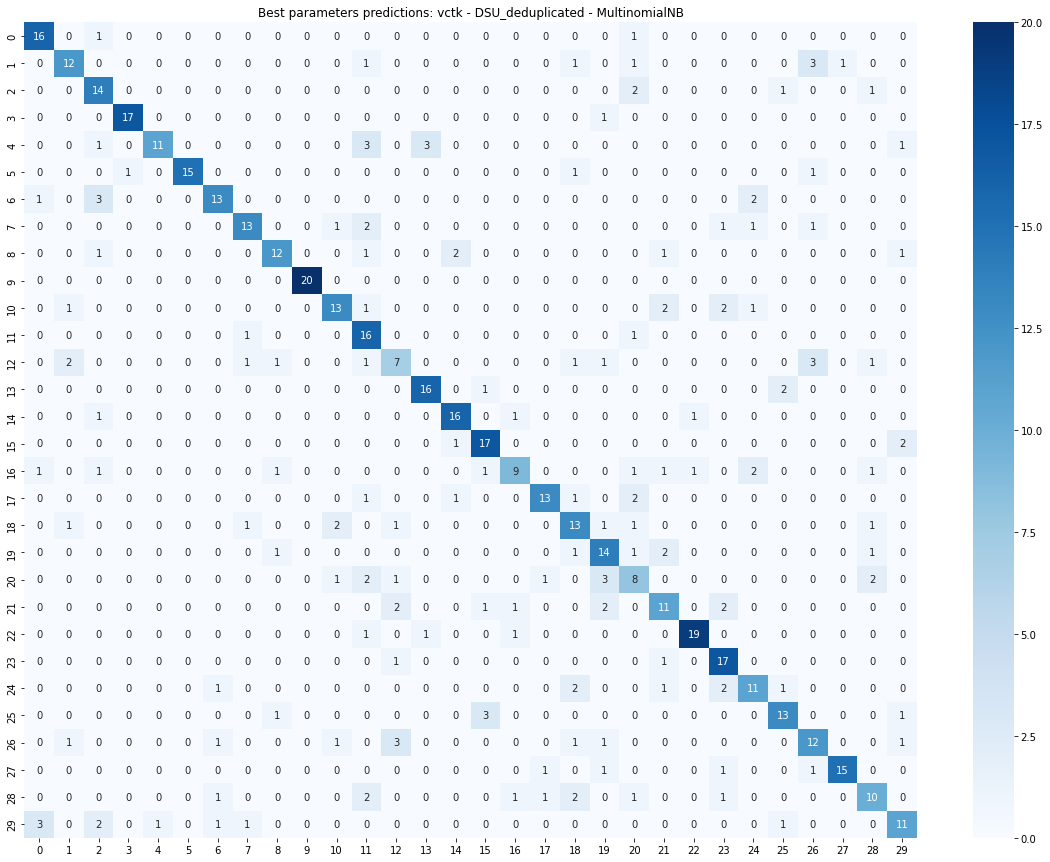

In [41]:
grid_mnb_bi_results = []
confusion_matrices_bi_mnb = []
for dataset_name, dataset_data in vectorized_datasets_bigrams.items():
    for feature_name in ['text', 'DSU', 'DSU_deduplicated']:
        results, matrices = train_grid_search(  
            vectorized_datasets_bigrams,
            dataset_name,
            feature_name,
            model=mnb,
            param_grid=param_grid_mnb,
            scoring_metric='f1_weighted'
        )

        grid_mnb_bi_results.extend(results) 
        confusion_matrices_bi_mnb.extend(matrices)

## Results

In [37]:
pd.DataFrame(grid_mnb_results)

,Dataset,Feature,Model,Accuracy,F1-Score
0,librispeech,text,MultinomialNB,0.545455,0.543092
1,librispeech,DSU,MultinomialNB,0.963068,0.962380
2,librispeech,DSU_deduplicated,MultinomialNB,0.968750,0.968088
3,vctk,text,MultinomialNB,0.001751,0.003002
4,vctk,DSU,MultinomialNB,0.612960,0.612499
5,vctk,DSU_deduplicated,MultinomialNB,0.670753,0.667871


In [42]:
pd.DataFrame(grid_mnb_bi_results)

,Dataset,Feature,Model,Accuracy,F1-Score
0,librispeech,text,MultinomialNB,0.420455,0.408930
1,librispeech,DSU,MultinomialNB,0.980114,0.980027
2,librispeech,DSU_deduplicated,MultinomialNB,0.982955,0.982792
3,vctk,text,MultinomialNB,0.005254,0.004575
4,vctk,DSU,MultinomialNB,0.670753,0.670571
5,vctk,DSU_deduplicated,MultinomialNB,0.707531,0.707040
